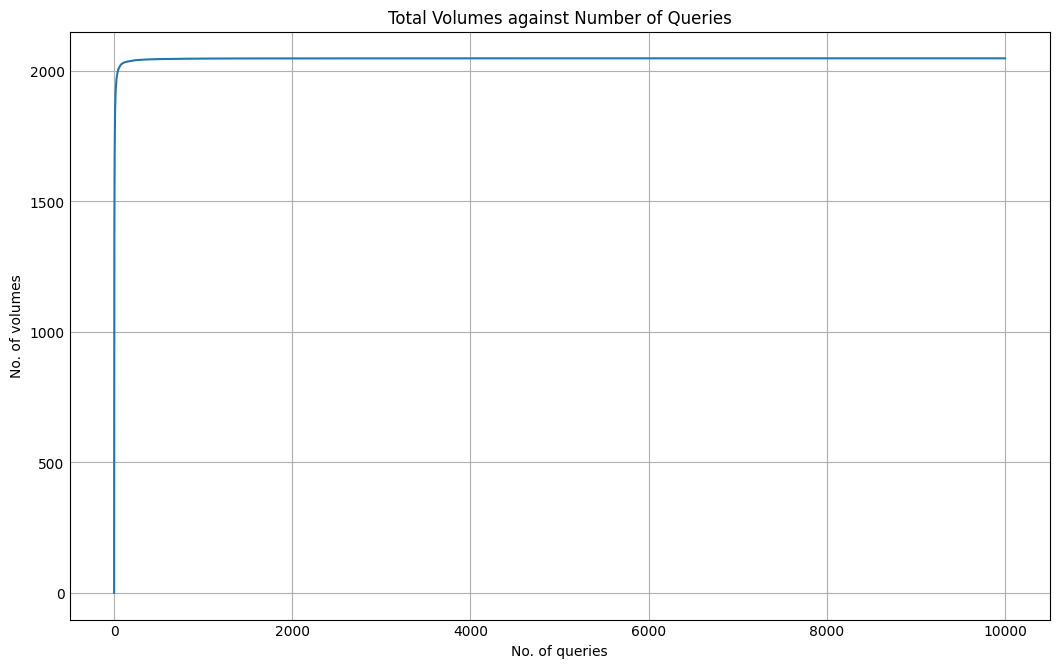

In [54]:
import random
import matplotlib.pyplot as plt

RSEmax = 2048
no_of_runs = 200
no_of_queries = 10000

query_range_list = []
for i in range (RSEmax):
    for j in range (i+1):
        query_range_list.append(j)

def askqry():
    no_range = random.choice(query_range_list)

    first_int = random.randint(1, RSEmax-no_range)
    query = (first_int, first_int+no_range)
    return(query)

max_volumes = RSEmax
def cont_query(no_of_runs, no_of_queries):
    arr = [0 for i in range(no_of_queries+1)]
    for h in range(no_of_runs):
        vol_tracker = []
        vol_sum = 0
        for j in range(no_of_queries):
            (start_int, end_int) = askqry()
            if len(vol_tracker) >= max_volumes:
                when_max_reach = j
                for v in range(when_max_reach, no_of_queries):
                    arr[v+1] = max_volumes + arr[v+1]
                break
            else:
                for i in range(start_int, end_int+1):
                    if i not in vol_tracker:
                        vol_tracker.append(i)
                        vol_sum += 1
                arr[j+1] =  arr[j+1] + vol_sum  
    for i in range(no_of_queries):
        arr[i+1]= arr[i+1] / no_of_runs
    return(arr)

arr = cont_query(no_of_runs, no_of_queries)

plt.style.use('_mpl-gallery')
plt.figure(figsize=(10,6))
plt.plot(arr)
plt.xlabel("No. of queries")  
plt.ylabel("No. of volumes")  
plt.title("Total Volumes against Number of Queries")  
plt.show()